# Visualizing fire scares through false color

#### Author: Austin Martinez  
#### GitHub Repository: https://github.com/austinmartinez12/eds220-hwk4


## About Section

#### Purpose: 
The purpose of the notebook was to use false-color Landsat 8 imagery to visualize the extent of Palisades and Eaton fire perimeters around the LA County area. False-color was used to enhance burn severity and vegetation patterns in the background image. The false-color composite was made up of SWIR, NIR, and Red bands.

#### Highlights: 

- Created a false-color image using using SWIR, NIR, and Red bands from the Landsat 8 raster.
- Reprojected the CRS of Eaton and Palisades shapefiles to match the Landsat 8 raster's CRS.
- Replaced NaNs in the Landsat 8 raster's bands with 0s.
- Plotted the Eaton and Palisades perimeters onto the false-color image.

#### About the data:

- **Eaton_Perimeter_20250121.shp:** Dissolved fire perimeter/boundary of the Eaton Fire that took place during January 2025. It was collected by the NIFC FIRIS program.
- **Palisades_Perimeter_20250121.shp:** Dissolved fire perimeter/boundary of the Palisades Fire that took place during January 2025. It was collected by the NIFC FIRIS program.
- **landsat8-2025-02-23-palisades-eaton.nc:** This dataset is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data, collected by the Landsat 8 satellite.

#### References: 

- 1. County of Los Angeles. (2025). Palisades and Eaton dissolved fire perimeters (2025) [Feature layer]. ArcGIS Hub. https://services1.arcgis.com/jUJYIo9tSA7EHvfZ/ArcGIS/rest/services/CA_Perimeters_NIFC_FIRIS_public_view/FeatureServer. [Accessed Nov. 20, 2025]
- 2. U.S. Geological Survey. (2025). Landsat Collection 2 Level-2 surface reflectance (red, green, blue, near-infrared, shortwave infrared) for Eaton and Palisades fires, Los Angeles County, CA [NetCDF dataset]. Microsoft Planetary Computer. https://planetarycomputer.microsoft.com/. [Accessed Nov. 20, 2025]



### Reading in Data

In the code 3 code chunks are for importing the libraries necessary for running this notebook. Reproducible file path were created using os, these file path were used to read in the shapefiles and raster. The 3 datasets were named Eaton(Eaton shapefile), Palisades(Palisades shapefile), and Landsat_8(Landsat 8 raster).

In [ ]:
# Load in Libraries
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rio
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Create a reproducible file path
Eaton_fp = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
Palisades_fp = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
NC_fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc')

In [38]:
# Read in data
Eaton = gpd.read_file(Eaton_fp)
Palisades = gpd.read_file(Palisades_fp)
Landsat_8 = xr.open_dataset(NC_fp)


## 2. Fire perimeter data exploration

### Data Exploration

The 2 code chunks below were used to expore the 3 datasets. Descriptions of the findings are listed below each of the two code chunks.

In [39]:
# Check the crs
print(Eaton.crs)
print(Palisades.crs, "\n")

# Check dtypes
print(Eaton.dtypes)
print(Palisades.dtypes, "\n")

# Check column names
print(Eaton.columns)
print(Palisades.columns, "\n")

# Check column names
print(Eaton.columns)
print(Palisades.columns, "\n")

# Check shape of data
print(Eaton.shape)
print(Palisades.shape, "\n")

# Check if data are projected or geographic
print(f"The CRS of Eaton is projected: {Eaton.crs.is_projected}")
print(f"The CRS of Palisades is projected: {Palisades.crs.is_projected}", "\n")



EPSG:3857
EPSG:3857 

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object 

Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object')
Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object') 

Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object')
Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object') 

(20, 5)
(21, 5) 

The CRS of Eaton is projected: True
The CRS of Palisades is projected: True 



#### About the Eaton and Palisades data:
After exploring both the Eaton and the Palisades shape files I found that they have the same CRS. The CRS of both is projected. These shape files have the same data types, amount of columns, and column names. The only difference is in their rows. Palisades has 1 more row than Eaton. Since this data is so similar I will most likely join them later on for simplicity.

## 3. NetCDF data import and exploration

In [40]:
# Print Landsat_8 to explore its contents
Landsat_8


<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

#### About the Landsat_8 data:
After exploring the Landsat_8 NetCDF file, I found that its dimensions are (y: 1418, x: 2742). The coordinates of Landsat_8 are in the CRS EPSG:32611 and its CRS is a projection. Its resolution is 30 and it's in units of meters. Both x and y have the data type of float64. Time has a data type of datetime64[ns]. The data’s variables are red(red visible light), green(visible green light), blue(visible blue light), nirO8(near-infrared light), swir22(shortwave infrared light), and spatial_ref(stores the dataset’s CRS/projection information). All the data types are float32 except for spatial_ref, which has a data type of int64.

## 4. Restoring geospatial information

### Data Cleaning and Visualization - True Color

The 5 code chunks below are used to clean the data, so that a true color image can be created from landsat_8.

In the code chunk below, the crs for Landsat_8 is stored in the spatial_ref variable. To recover the geospatial information from it rio.write_crs() was used. rio.crs can now be used to access the CRS of landsat_8.

In [41]:
# Use rio.crs to print Landsat_8 CRS
print(Landsat_8.rio.crs, "\n")

# Print the CRS by using the spatial_ref.crs_wkt attribute
print(Landsat_8.spatial_ref.crs_wkt, "\n")

# Recover the geospatial information by using rio.write_crs()
Landsat_8.rio.write_crs(Landsat_8.spatial_ref.crs_wkt, inplace=True)

# Print the CRS of the updated dataset
print("Updated CRS:", Landsat_8.rio.crs, "\n")


None 

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]] 

Updated CRS: EPSG:32611 



## 5. True color image

In the code chunk below, the red, green, and blue variables (in that order) of the xarray.Dataset were selected and were converted to an array using the to_array() method. The array was then plotted using .plot.imshow() to create an RGB image with the data. Unfortunately, no image was produced because of the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


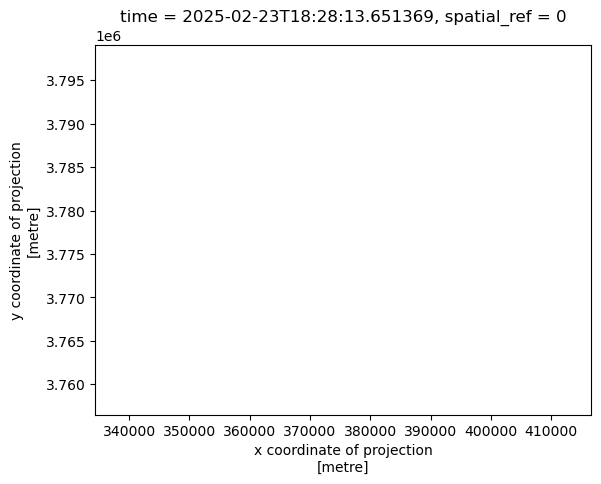

In [42]:
# Select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data
# Use .plot.imshow() to create an RGB image with the data
Landsat_8[["red", "green", "blue"]].to_array().plot.imshow()

In the code chunk below, the parameter robust=True was used to adjust the scale used for plotting the bands to get a true color image.

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


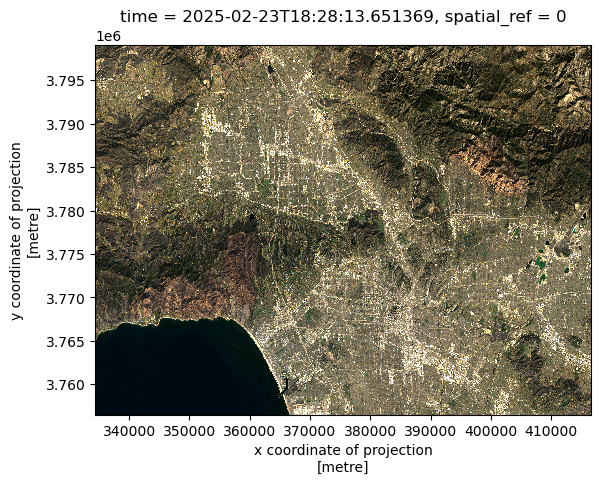

In [43]:
# Use .plot.imshow() to create an RGB image with the data
Landsat_8[["red", "green", "blue"]].to_array().plot.imshow(robust=True)

In the nect 2 code chunks below, to resolve the warning the bands with nan values were identified using a for loop and .fillna() was used to replace the nan values with 0s. The bands blue and green had nans. Once, the nans were replaced with 0s the warning was resolved.

In [44]:
# Select "red", "green", "blue" bands
bands = ["red", "green", "blue"]

# Check for nans in each band
for band in bands:
    has_nan = np.isnan(Landsat_8[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

red contains NaN values? False
green contains NaN values? True
blue contains NaN values? True


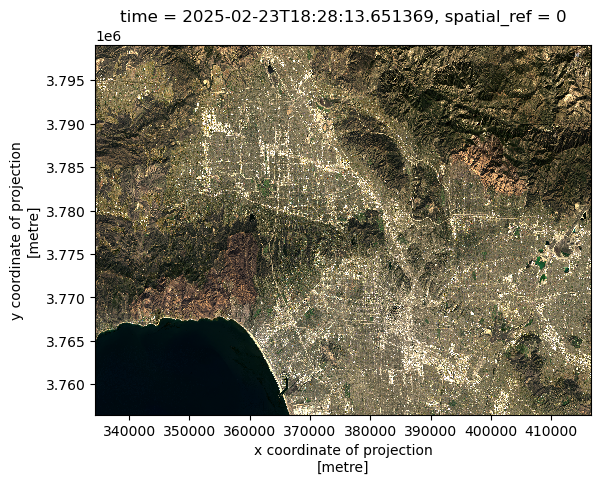

In [45]:
# Fill NaNs with 0 to avoid casting issues
Landsat_8[["green", "blue"]] = Landsat_8[["green", "blue"]].fillna(0)

# Plot RGB raster
Landsat_8[["red", "green", "blue"]].to_array().plot.imshow(robust=True)

The ouputs for parts (a) and (e) are supposed to display a true color image. Unforntunitly, the output for part a displays no image and a warning. The output for part e displays an image with no warning. The outputs differ because part a's bands still contains nan values and extreme outlier pixel values from clouds. These two issues were fixed before part e's output by using .fillna() to replace nans with 0s in the blue and green bands. Also, robust was set to True to account for the extreme outlier pixel values.

## 6. False color image

### Data Cleaning and Visualization - False-color

The 3 code chunks below are used to clean the data, so that a false-color image can be created from landsat_8.

The code chunk below created a false-color image by using the "swir22", "nir08", and "red" bands. This was plotted using the same method used with the true color image.

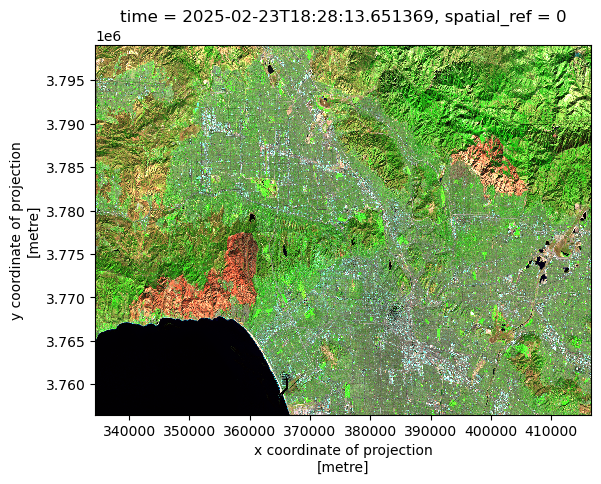

In [46]:
# Use .plot.imshow() to create a false color image with the data
Landsat_8[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

## 7. Map

In the code chunk below, the CRS of Eaton and Palisades was reprojected to match the Landsat_8 CRS. This was done so we can plot the Eaton and Palisades perimeters onto the false-color image. A for loop was then used to identify that the "swir22", "nir08" had nan values. To resolve this .fillna(0) was used to replace the nan values with 0s.

In [47]:
# Change the CRS of Palisades and Eaton to match Landsat_8
Palisades = Palisades.to_crs(Landsat_8.rio.crs)
Eaton = Eaton.to_crs(Landsat_8.rio.crs)

# Verify the CRS of Palisades and Eaton to match Landsat_8
print(Palisades.crs == Landsat_8.rio.crs)
print(Eaton.crs == Landsat_8.rio.crs)

# Select "swir22", "nir08" bands
bands = ["swir22", "nir08"]

# Check for nans in each band
for band in bands:
    has_nan = np.isnan(Landsat_8[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

# Fill NaNs with 0 to avoid casting issues
Landsat_8[["swir22", "nir08"]] = Landsat_8[["swir22", "nir08"]].fillna(0)



True
True
swir22 contains NaN values? False
nir08 contains NaN values? False


The code chunk below is used to plot the Eaton and Palisades perimeters onto the false-color image.

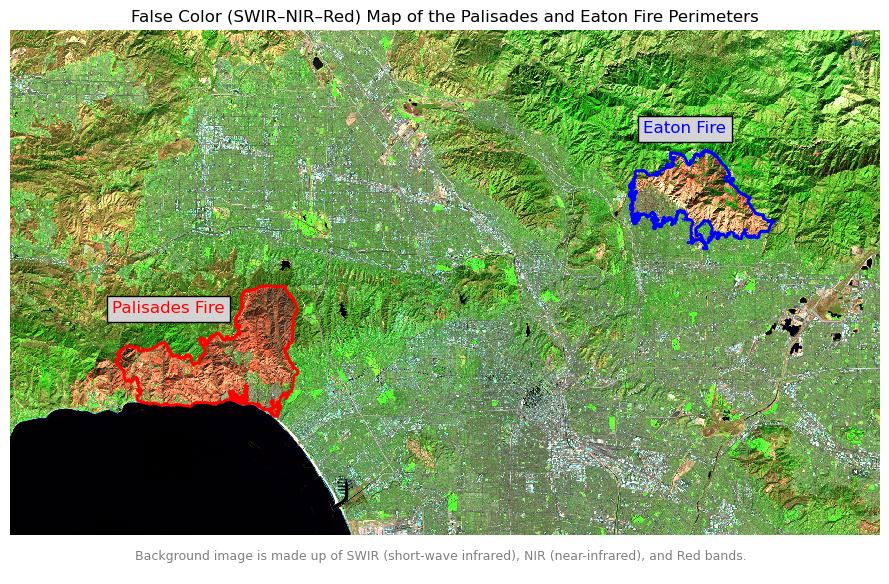

In [48]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Add Palisades and Eaton fire perimeters
Palisades.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
Eaton.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2,legend=True)

# Add false color raster
Landsat_8[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

# Add title
ax.set_title('False Color (SWIR–NIR–Red) Map of the Palisades and Eaton Fire Perimeters')

## # Add annotation describing the false color
plt.annotate(
    'Background image is made up of SWIR (short-wave infrared), NIR (near-infrared), and Red bands.',
    xy=(0.15, 0.04),
    xycoords='figure fraction',
    fontsize=9,
    color='gray'
)

# Add labels with gray background
plt.figtext(0.13, 0.47, "Palisades Fire", color='red', fontsize=12, bbox=dict(facecolor='lightgray'))
plt.figtext(0.72, 0.77, "Eaton Fire", color='blue', fontsize=12, bbox=dict(facecolor='lightgray'))

# Remove axes
ax.axis('off')

# Display the map
plt.tight_layout()
plt.show()

#### Map Description:
The map above shows a false color image of the LA County area, displaying the perimeter of fires that occured in the Palisades(in red) and Eaton(in blue). False color imagery is being used in the background image. The background image is made up of SWIR (short-wave infrared), NIR (near-infrared), and Red bands. These bands are used to enhance burn severity and vegetation patterns. The false colors in this background image show healthy vegetation as bright green, urban areas as cyan/gray, and burnt area areas as a reddish brown.